#6-1: Maximum Amount of Gold

In [ ]:
import sys


def pesoOptimo(W, w):
    w = [0] + w


    piezas = len(w)
    
    
    capacidad = W + 1

    pesos = [[0 for _ in range(piezas)] for _ in range(capacidad)]

    
    
    for i in range(1, piezas):
        
        for j in range(1, capacidad):
            pesos[j][i] = pesos[j][i - 1]
            
            
            if w[i] <= j:
                val = pesos[j - w[i]][i - 1] + w[i]
                
                
                if pesos[j][i] < val:
                    pesos[j][i] = val

    
    return pesos[-1][-1]


if __name__ == "__main__":
    input = sys.stdin.read()
    W, n, *w = list(map(int, input.split()))
    print(pesoOptimo(W, w))

#6-2: Partitioning Souvenirs

In [ ]:
import numpy

# Discrete Knapsack problem without repetition
def dividir(W, n, objetos):
    count = 0 
    valor = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            valor[i][j] = valor[i][j-1]
            if objetos[j-1]<=i:
                temp = valor[i-objetos[j-1]][j-1] + objetos[j-1]
                if temp > valor[i][j]:
                    valor[i][j] = temp
            if valor[i][j] == W: count += 1

    if count < 3: print('0')
    else: print('1')

if __name__ == '__main__':
    n = int(input())
    pesos = [int(i) for i in input().split()]
    pesoTotal = sum(pesos)
    if n<3: 
        print('0')
    elif pesoTotal%3 != 0: 
        print('0')
    else:
        dividir(pesoTotal//3, n, pesos)

#6-3: Maximum Value of an Arithmetic Expression

In [ ]:
import math

def MinAndMax(M, m, i, j, operadores):

    minimo = math.inf
    maximo = -math.inf
    for k in range(i, j):
        a = calc(M[i][k], M[k+1][j], operadores[k])
        b = calc(M[i][k], m[k+1][j], operadores[k])
        c = calc(m[i][k], M[k+1][j], operadores[k])
        d = calc(m[i][k], m[k+1][j], operadores[k])
        minimo = min(minimo, a, b, c, d)
        maximo = max(maximo, a, b, c, d)
    return minimo, maximo

def calc(a, b, op):

    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    else:
        return a * b

def valor_maximo(operandos, operadores):

    n = len(operandos)
    m = [[None for x in range(n)] for x in range(n)]
    M = [[None for x in range(n)] for x in range(n)]

    for i in range(n):
        m[i][i] = operandos[i]
        M[i][i] = operandos[i]

    for s in range(1, n):
        for i in range(0, n-s):
            j = i + s
            m[i][j], M[i][j] = MinAndMax(M, m, i, j, operadores)

    return M[0][n-1]


if __name__ == "__main__":
    expression = input()
    operadores, operandos = [], []

    for i in expression:
        if i in ['+', '-', '*']:
            operadores.append(i)
        else:
            operandos.append(int(i))

    print(valor_maximo(operandos, operadores))

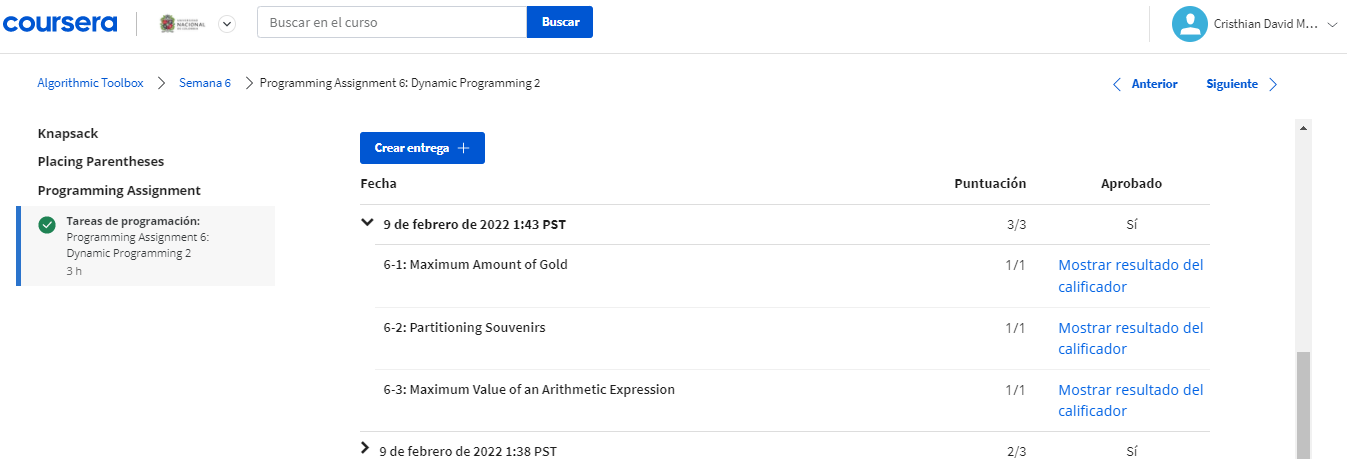

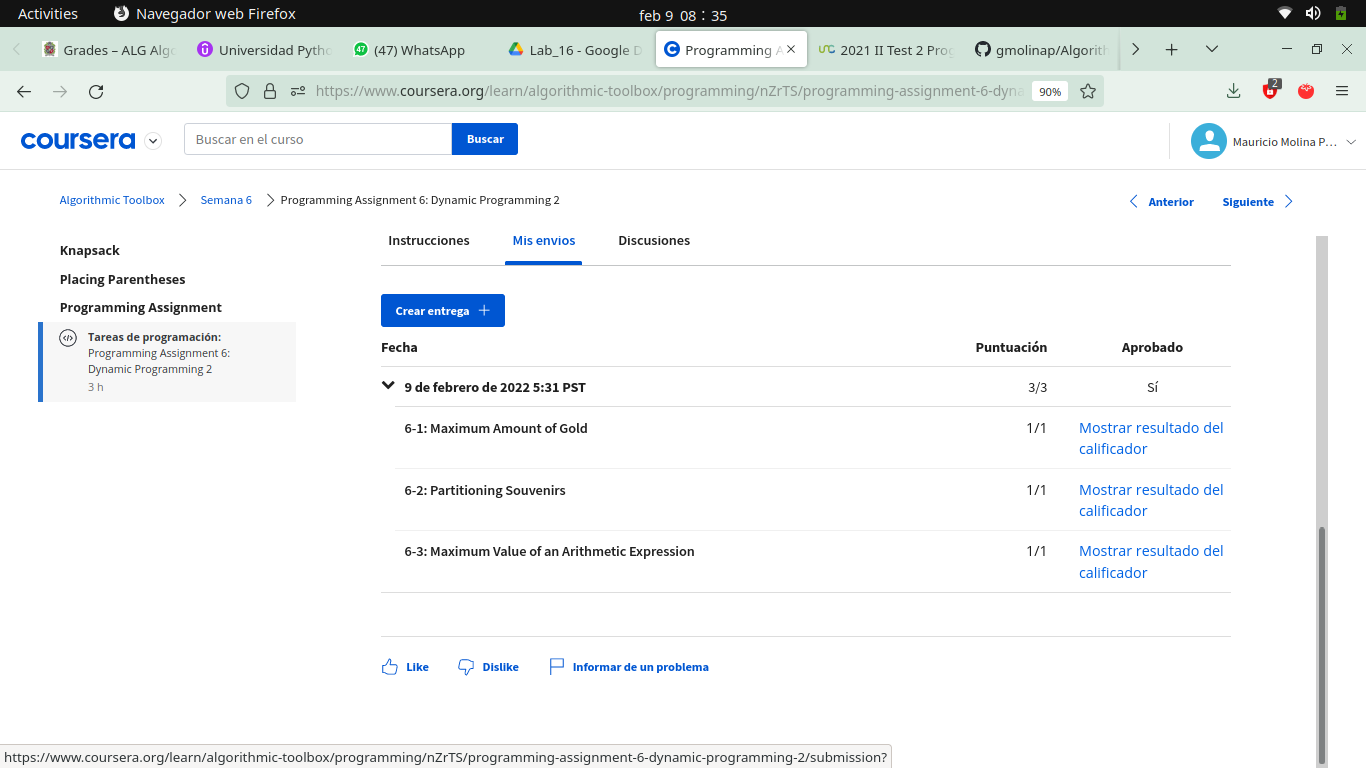